In [111]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobile-price-classification/test.csv
/kaggle/input/mobile-price-classification/train.csv


# There is a mistake there is train and test data is same, So we will take only Train csv file

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [113]:
df_train = pd.read_csv("/kaggle/input/mobile-price-classification/train.csv")

In [114]:
df_train.index

RangeIndex(start=0, stop=2000, step=1)

In [115]:
df_test = pd.read_csv("/kaggle/input/mobile-price-classification/train.csv")

In [116]:
print(df_train.shape)
df_train.head()

(2000, 21)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [117]:
df_train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [118]:
df_train.price_range.value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

In [119]:
print(df_train.isnull().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


# Here we can see correlation of price_range column on other columns

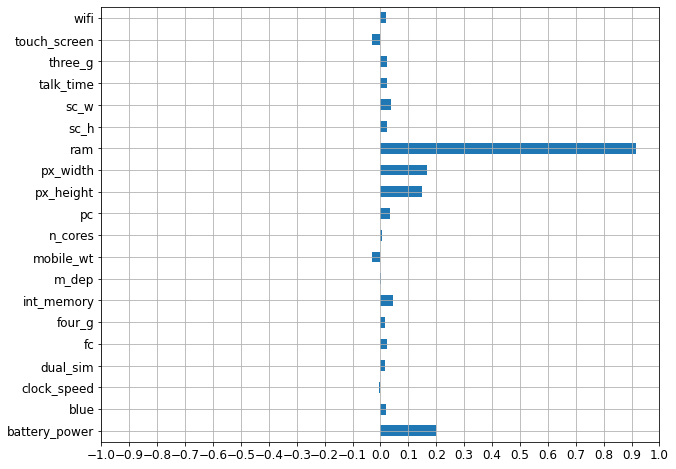

In [120]:
df_train.drop(axis=1,columns = ["price_range"]).corrwith(df_train["price_range"]).plot(kind="barh",grid=True,xlim = (-1,1),xticks = np.linspace(start=-1,stop=1,num=21),figsize=(10,8),fontsize=12)

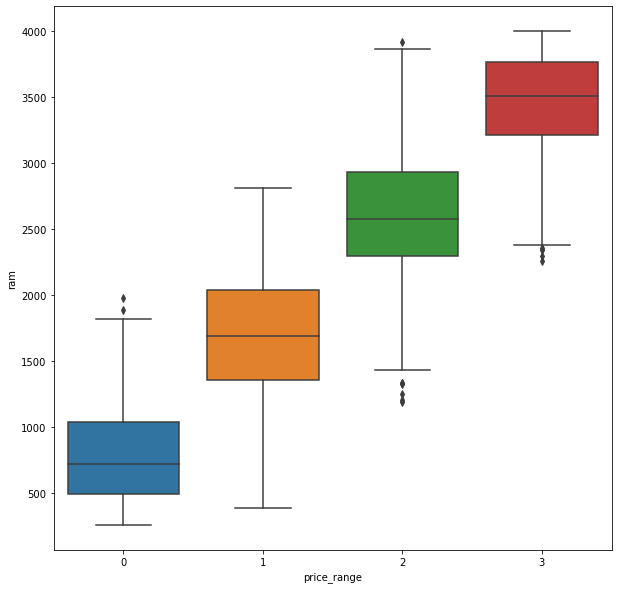

In [121]:
plt.figure(figsize=(10,10))
sns.boxplot(y = df_train["ram"],x = df_train['price_range'])

# Distribution can be seen by swarm-plot

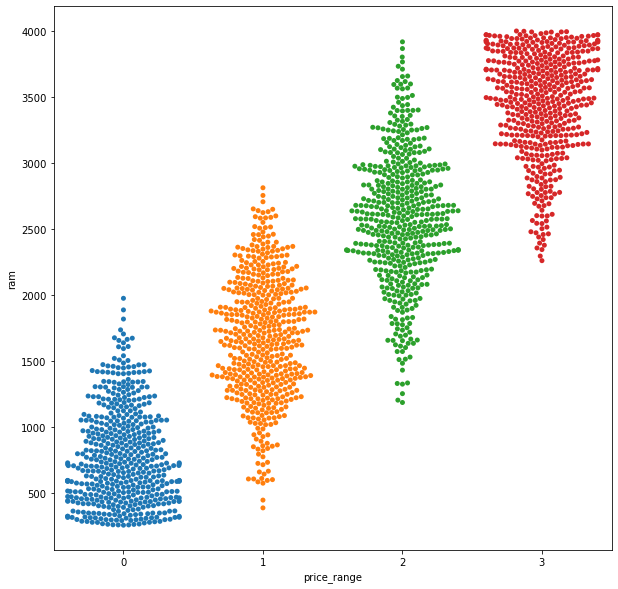

In [122]:
plt.figure(figsize=(10,10))
sns.swarmplot(y = df_train["ram"],x = df_train['price_range'])

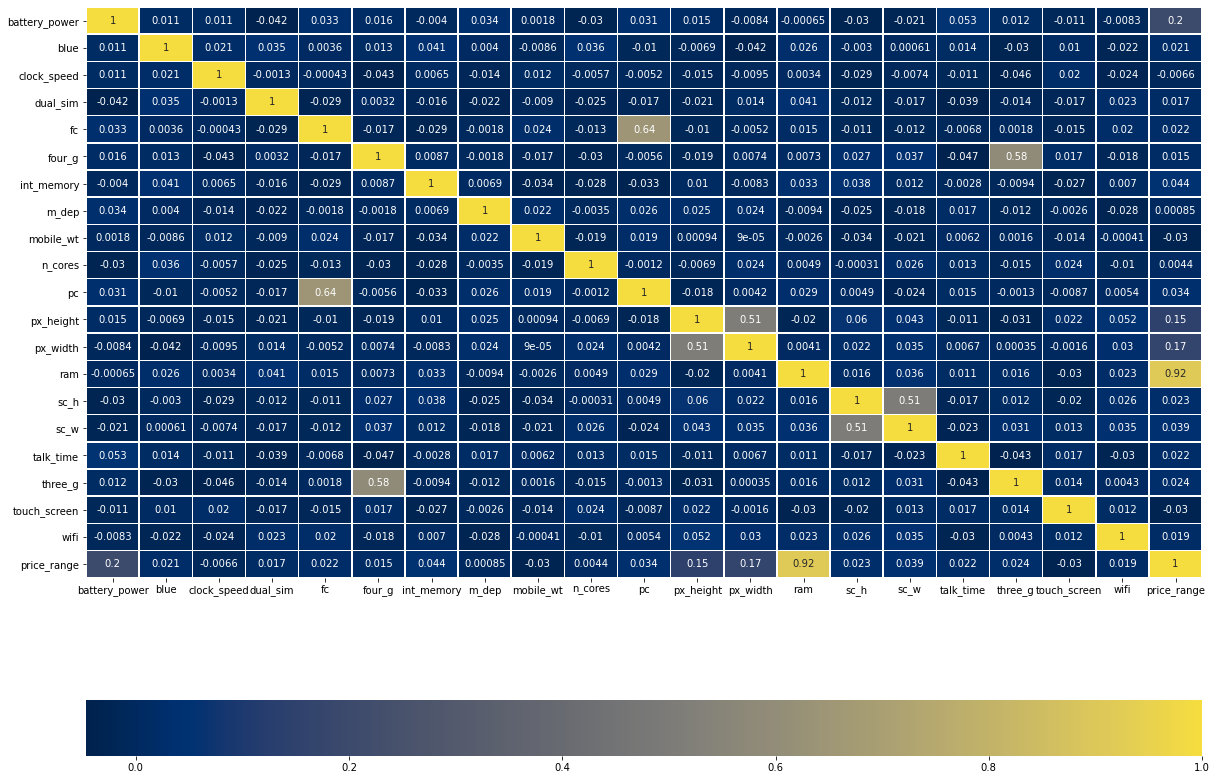

In [123]:
plt.figure(figsize=(20,15))
sns.heatmap(df_train.corr(),cmap="cividis",annot=True,center=0.5,linewidths=.5,cbar_kws={"orientation": "horizontal"})


### here we can see that if we remove some features there will be no impact, But we remove by OLS method one by one feature.

In [124]:
df_train.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

In [125]:
def column_type(df):
    categorical_column = []
    continuous_column = []
    for col in df.columns:
        if len(df[col].unique())<=10:
            categorical_column.append(col)
        else:
            continuous_column.append(col)
    return [categorical_column,continuous_column]
            
            
        

In [126]:
cat_col, cont_col = column_type(df_train.drop(columns=["price_range"],axis=1))

In [127]:
cat_col

['blue',
 'dual_sim',
 'four_g',
 'm_dep',
 'n_cores',
 'three_g',
 'touch_screen',
 'wifi']

In [128]:
cont_col

['battery_power',
 'clock_speed',
 'fc',
 'int_memory',
 'mobile_wt',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time']

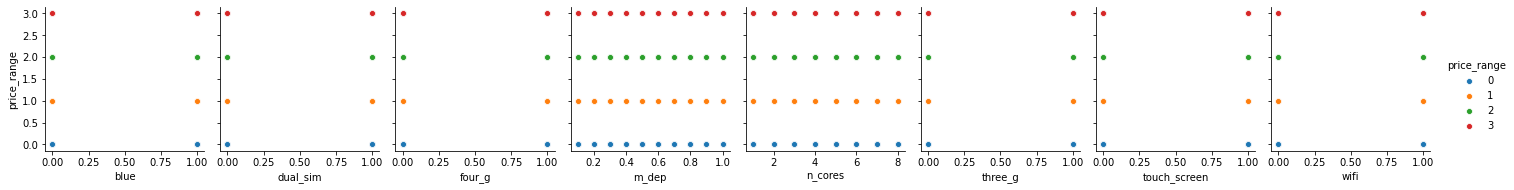

In [129]:
sns.pairplot(df_train, x_vars = cat_col,y_vars = ["price_range"],hue ="price_range",kind="scatter")

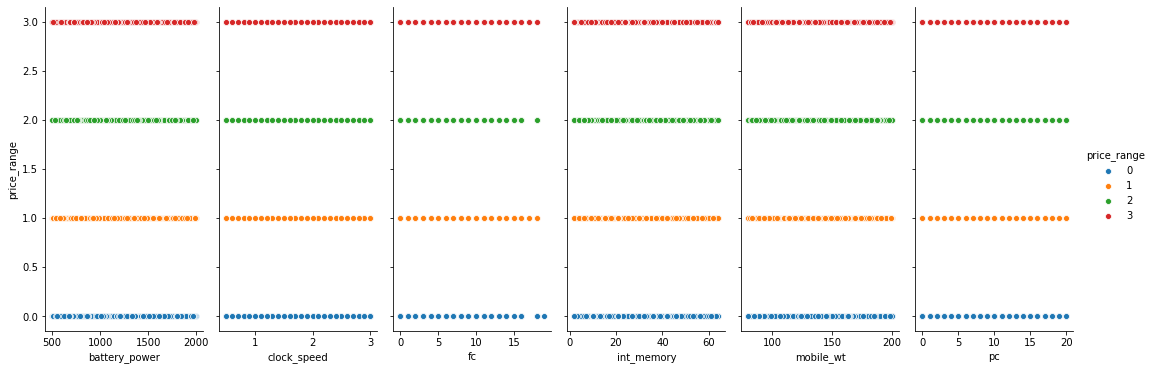

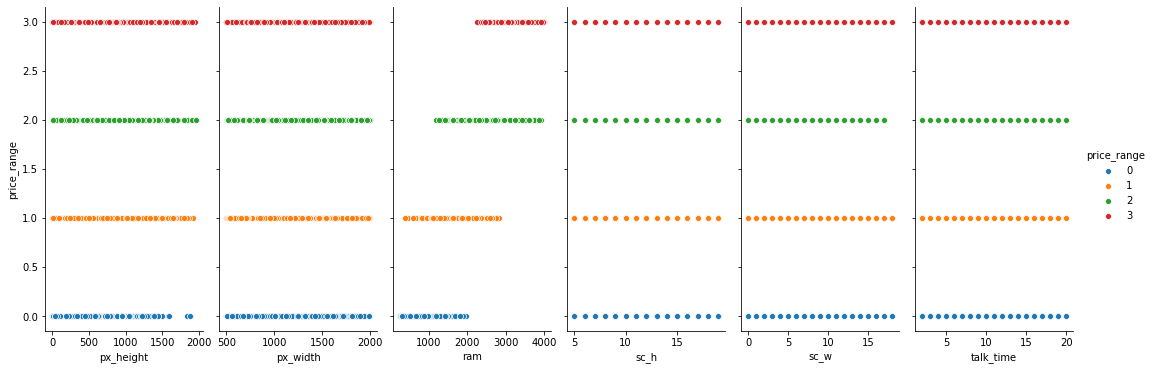

In [130]:
#fig,ax = plt.subplots(figsize=(10,6))
#plt.figure(figsize=(15,8))

sns.pairplot(df_train, x_vars = cont_col[:6],y_vars = ["price_range"],height = 5,aspect=0.5,hue = "price_range")
sns.pairplot(df_train, x_vars = cont_col[6:],y_vars = ["price_range"],height = 5,aspect=0.5,hue = "price_range")
# g.fig.set_figwidth(25)
# g.fig.set_figheight(5)

In [131]:
X = df_train.drop(axis=1,columns = ["price_range"])
y = df_train.price_range

In [132]:
X_ = pd.get_dummies(X,columns=cat_col)

In [133]:
print(X_.shape)
X_.head()

(2000, 42)


,battery_power,clock_speed,fc,int_memory,mobile_wt,pc,px_height,px_width,ram,sc_h,...,n_cores_5,n_cores_6,n_cores_7,n_cores_8,three_g_0,three_g_1,touch_screen_0,touch_screen_1,wifi_0,wifi_1
0,842,2.2,1,7,188,2,20,756,2549,9,...,0,0,0,0,1,0,1,0,0,1
1,1021,0.5,0,53,136,6,905,1988,2631,17,...,0,0,0,0,0,1,0,1,1,0
2,563,0.5,2,41,145,6,1263,1716,2603,11,...,1,0,0,0,0,1,0,1,1,0
3,615,2.5,0,10,131,9,1216,1786,2769,16,...,0,1,0,0,0,1,1,0,1,0
4,1821,1.2,13,44,141,14,1208,1212,1411,8,...,0,0,0,0,0,1,0,1,1,0


In [134]:
x_train,x_test,y_train,y_test = train_test_split(X_,y,train_size=0.8, random_state = 1)

In [135]:
std = StandardScaler()
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)

# 1.logistic Regression

In [136]:
from sklearn.linear_model import LogisticRegression

In [137]:
model_1 = LogisticRegression(solver="liblinear",random_state=42,C=1)
model_1.fit(x_train,y_train)
print(model_1.score(x_train,y_train)*100)
print(model_1.score(x_test, y_test)*100)


85.5
79.5


# 2.K-Neighbors 

In [138]:
from sklearn.neighbors import KNeighborsClassifier

In [139]:
model_2 = KNeighborsClassifier(n_neighbors = 5,weights='distance')

In [140]:
model_2.fit(x_train,y_train)
print(model_2.score(x_train,y_train)*100)
print(model_2.score(x_test, y_test)*100)

100.0
38.5


# 3.Naive-Bayes

In [141]:
from sklearn.naive_bayes import GaussianNB

In [142]:
model_3 = GaussianNB()
model_3.fit(x_train,y_train)
print(model_3.score(x_train,y_train)*100)
print(model_3.score(x_test, y_test)*100)

77.125
66.0


# 4.Support Vector

In [143]:
from sklearn.svm import SVC

In [144]:
model_4 = SVC(kernel = "rbf",C=0.9)
model_4.fit(x_train,y_train)
print(model_4.score(x_train,y_train)*100)
print(model_4.score(x_test, y_test)*100)

97.75
81.0


# 5.Decision Tree

In [145]:
from sklearn.tree import DecisionTreeClassifier

In [146]:
model_5 = DecisionTreeClassifier(random_state=42,max_depth=7,criterion="gini",splitter = "best")
model_5.fit(x_train,y_train)
print(model_5.score(x_train,y_train)*100)
print(model_5.score(x_test, y_test)*100)

96.0625
84.75


In [147]:
model_5.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 7,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 42,
 'splitter': 'best'}

 # 6.Ensemble 
## 1. Random Forest 

In [148]:
from sklearn.ensemble import RandomForestClassifier

In [149]:
model_6 = RandomForestClassifier(max_depth = 10,n_estimators=250,criterion='gini',random_state=42)
model_6.fit(x_train,y_train)
print(model_6.score(x_train,y_train)*100)
print(model_6.score(x_test, y_test)*100)

100.0
85.5


## 2.Gradient Boost

In [150]:
from sklearn.ensemble import GradientBoostingClassifier

In [151]:
model_7 = GradientBoostingClassifier(random_state=42)
model_7.fit(x_train,y_train)
print(model_7.score(x_train,y_train)*100)
print(model_7.score(x_test, y_test)*100)

99.875
88.25


# 7.XGB Classifier

In [152]:
from xgboost import XGBClassifier

In [153]:
model_8 = XGBClassifier()
model_8.fit(x_train,y_train)
print(model_8.score(x_train,y_train)*100)
print(model_8.score(x_test, y_test)*100)

100.0
89.5


# Tuning of classifier 

In [154]:
from sklearn.model_selection import GridSearchCV

# 1.Logistic regression

In [155]:
params = {"C":np.linspace(0,10,11), "solver":["liblinear","lbfgs","newton-cg"],"max_iter":[200]}

#scoring= ['accuracy', 'precision','recall']
log_reg = LogisticRegression()
gridsearch = GridSearchCV(estimator=log_reg,param_grid = params,scoring = "accuracy",n_jobs = -1,cv = 5)
gridsearch.fit(x_train,y_train)
gridsearch.best_estimator_
          

LogisticRegression(C=3.0, max_iter=200)

In [156]:
gridsearch.best_params_

{'C': 3.0, 'max_iter': 200, 'solver': 'lbfgs'}

In [157]:
gridsearch.best_score_

0.9506249999999999

In [158]:
tuned_log_reg = LogisticRegression(C= 1.0, max_iter= 200, solver= 'newton-cg')
tuned_log_reg.fit(x_train,y_train)
print(tuned_log_reg.score(x_train,y_train)*100)
print(tuned_log_reg.score(x_test, y_test)*100)


97.25
93.5



# 2.Support vector
###            1.Gaussian kernel

In [ ]:
params = {"C":[0.01,0.1,1,3,5,8,10,18,25],"gamma":[0.05,0.1,0.5,0.75,1],"kernel":['linear','rbf','sigmoid']}#,"degree":[1,2,3,4,5],"coef0":[0.001,0.05,0.1,1,2,3,4,5]}
svc = SVC()
gridsearch = GridSearchCV(estimator=svc,param_grid = params,scoring = "accuracy",n_jobs = -1,cv = 5,iid = True)
gridsearch.fit(x_train,y_train)
# print(gridsearch.best_estimator_)
# print(gridsearch.best_params_)
# print(gridsearch.best_score_)


In [159]:
tuned_svc_1 = SVC(C=8, gamma=0.05, kernel='linear')
tuned_svc_1.fit(x_train,y_train)

print(tuned_svc_1.score(x_train,y_train)*100)

print(tuned_svc_1.score(x_test, y_test)*100)

98.875
95.5


### 2.polynomial Kernel

In [ ]:
params = {"gamma":[0.05,0.1,0.5,0.75,1],"kernel":['poly'],"degree":[1,2,3],"coef0":[0.001,0.05,0.1,1,2,4,5]}
svc = SVC()
gridsearch = GridSearchCV(estimator=svc,param_grid = params,scoring = "accuracy",n_jobs = -1,cv = 5,iid = True)
gridsearch.fit(x_train,y_train)
# print(gridsearch.best_estimator_)
# print(gridsearch.best_params_)
# print(gridsearch.best_score_)

In [160]:
tuned_svc = SVC(coef0=0.001, degree=1, gamma=1, kernel='poly')
tuned_svc.fit(x_train,y_train)

print(tuned_svc.score(x_train,y_train)*100)

print(tuned_svc.score(x_test, y_test)*100)

97.5625
94.5


# 3.Decision Classifier

In [ ]:
params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":[2, 3, 4], 
          "min_samples_leaf":list(range(1, 20))
          }

tree = DecisionTreeClassifier(random_state=42)
gridsearch = GridSearchCV(tree, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3, iid=True)
gridsearch.fit(x_train,y_train)
# print(gridsearch.best_estimator_)
# print(gridsearch.best_params_)
# print(gridsearch.best_score_)

In [161]:
tuned_dtc = DecisionTreeClassifier(max_depth=8, min_samples_leaf=4, random_state=42)
tuned_dtc.fit(x_train,y_train)

print(tuned_dtc.score(x_train,y_train)*100)

print(tuned_dtc.score(x_test, y_test)*100)

95.1875
85.25


# 4.Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rand_forest = RandomForestClassifier(random_state=42)

rf_random = RandomizedSearchCV(estimator=rand_forest, param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(x_train,y_train)
# # print(rf_random.best_estimator_)
# # print(rf_random.best_params_)
# # print(rf_random.best_score_)

### There is not any countable benefit, so we didn't tune our RandomForestClassifier

# 5.Gradient boost

In [ ]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
learning_rate = [0.001,0.1,0.2,0.5,0.75,1]

params = {'learning_rate': learning_rate,'n_estimators': n_estimators, 'max_features': max_features}
               #'max_depth': max_depth}# 'min_samples_split': min_samples_split,
              # 'min_samples_leaf': min_samples_leaf}
gbc = GradientBoostingClassifier()

gridsearch = GridSearchCV(gbc, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3, iid=True)
gridsearch.fit(x_train,y_train)
# print(gridsearch.best_estimator_)
# print(gridsearch.best_params_)
# print(gridsearch.best_score_)



### There is also not any countable benefit, But for practice it is writter here

In [162]:
tuned_gbc = GradientBoostingClassifier(learning_rate=1, max_features='auto',
                           n_estimators=200,validation_fraction=0.15)
tuned_gbc.fit(x_train,y_train)

print(tuned_gbc.score(x_train,y_train)*100)

print(tuned_gbc.score(x_test, y_test)*100)


100.0
89.25


# 6.XGB 

In [ ]:
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster = ['gbtree', 'gblinear']
base_score = [0.25, 0.5, 0.75, 0.99]
learning_rate = [0.05, 0.1, 0.15, 0.20]
min_child_weight = [1, 2, 3, 4]

hyperparameter_grid = {'n_estimators': [200,500], 'max_depth': [5,10,15],
                       'learning_rate' : learning_rate}#, 'min_child_weight' : min_child_weight, 
                       #'booster' : booster, 'base_score' : base_score
                      #}

xgb_model = XGBClassifier()

xgb_cv = RandomizedSearchCV(estimator=xgb_model, param_distributions=hyperparameter_grid,
                               cv=5, n_iter=650, scoring = 'accuracy',n_jobs =-1, iid=True,
                               verbose=1, return_train_score = True, random_state=42)

In [163]:
xgb_cv.fit(x_train, y_train)
print(xgb_cv.best_estimator_)
print(xgb_cv.best_params_)
print(xgb_cv.best_score_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 24 is smaller than n_iter=650. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  2.9min finished
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
{'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.2}
0.915625


In [164]:
tuned_xgb = XGBClassifier(n_estimators= 500, max_depth = 5, learning_rate= 0.2)

In [165]:
tuned_xgb.fit(x_train,y_train)

print(tuned_xgb.score(x_train,y_train)*100)

print(tuned_xgb.score(x_test, y_test)*100)


100.0
90.0
